## Similitud Cosenos (Matriz de Similitud)

In [ ]:
import os
import javalang
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def limpiar_archivo_java(archivo):
    with open(archivo, 'r') as file:
        contenido = file.read()

    # Eliminar sangría y saltos de línea
    contenido = re.sub(r'\n\s*', '\n', contenido)

    # Eliminar comentarios de una línea
    contenido = re.sub(r'//.*', '', contenido)

    # Eliminar comentarios de múltiples líneas
    contenido = re.sub(r'/\*(.|\n)*?\*/', '', contenido)

    # Eliminar líneas de importación de bibliotecas
    contenido = re.sub(r'import\s+.*?;', '', contenido)

    # Eliminar líneas en blanco adicionales
    contenido = re.sub(r'\n\s*\n', '\n', contenido)

    return contenido

def generate_file_contents(folder_path):
    file_contents = {}
    files = [file for file in os.listdir(folder_path) if file.endswith('.java')]

    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        cleaned_content = limpiar_archivo_java(file_path)
        file_contents[file_name] = cleaned_content

    return file_contents

def calculate_cosine_similarity(file_contents):
    # Convertir los contenidos de los archivos a una lista
    corpus = list(file_contents.values())

    # Utilizar TfidfVectorizer para obtener las características de los archivos
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)

    # Calcular la matriz de similitud de cosenos entre los archivos
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

    return similarity_matrix

# Directorio que contiene los archivos Java
folder_path = ".\\conplag\\programs"

# Obtener los contenidos de los archivos
file_contents = generate_file_contents(folder_path)

# Calcular la similitud de cosenos entre los archivos
similarity_matrix = calculate_cosine_similarity(file_contents)

# Obtener los nombres de los archivos
file_names = list(file_contents.keys())

# Iterar sobre la matriz de similitud de cosenos y encontrar pares de archivos similares
for i in range(len(file_names)):
    for j in range(i + 1, len(file_names)):
        if similarity_matrix[i, j] > 0.65:
            print(f"Archivos similares: {file_names[i]} y {file_names[j]}, Similaridad: {similarity_matrix[i, j]}")


# print(similarity_matrix)
plt.figure(figsize=(32, 30))
heatmap = sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title("Matriz de similitud de cosenos entre archivos")
plt.xlabel("Archivos")
plt.ylabel("Archivos")
plt.show()

## Similitud Cosenos (ASTs)

In [190]:
from scipy.spatial.distance import cosine
import numpy as np
import os
import re
import javalang


def limpiar_archivo_java(archivo):
    with open(archivo, 'r') as file:
        contenido = file.read()

    # Eliminar sangría y saltos de línea
    contenido = re.sub(r'\n\s*', '\n', contenido)

    # # Eliminar comentarios de una línea
    # contenido = re.sub(r'//.*', '', contenido)

    # # Eliminar comentarios de múltiples líneas
    # contenido = re.sub(r'/\*(.|\n)*?\*/', '', contenido)

    # Eliminar líneas de importación de bibliotecas
    contenido = re.sub(r'import\s+.*?;', '', contenido)

    # Eliminar líneas en blanco adicionales
    contenido = re.sub(r'\n\s*\n', '\n', contenido)

    return contenido


carpeta = ".\\conplag\\test"
archivos_java = [archivo for archivo in os.listdir(
    carpeta) if archivo.endswith('.java')]

ast_trees = {}

for archivo in archivos_java:
    ruta_archivo = os.path.join(carpeta, archivo)
    contenido_limpio = limpiar_archivo_java(ruta_archivo)
    tokens = javalang.tokenizer.tokenize(contenido_limpio)

    try:
        parser = javalang.parser.Parser(tokens)
        ast_tree = parser.parse_member_declaration()
        # Guardar el AST en un diccionario con el nombre del archivo como clave
        ast_trees[archivo] = ast_tree
    except javalang.parser.JavaSyntaxError as e:
        print("Error de sintaxis en", archivo, ":", e)

In [ ]:
print(ast_trees)

## Conteo de tipos de datos totales

In [191]:
def contar_tipos_de_datos(ast_trees):
    tipos_de_datos = {}

    for archivo, ast_tree in ast_trees.items():
        # Recorrer el árbol sintáctico abstracto
        for _, node in ast_tree:
            # Obtener el tipo de nodo
            tipo = type(node).__name__
            # Incrementar el contador para este tipo de dato
            tipos_de_datos[tipo] = tipos_de_datos.get(tipo, 0) + 1

    return tipos_de_datos

# Obtener el conteo de tipos de datos
conteo_tipos_de_datos = contar_tipos_de_datos(ast_trees)

# Mostrar los resultados
for tipo, conteo in conteo_tipos_de_datos.items():
    print(f"{tipo}: {conteo}")

ClassDeclaration: 75
MethodDeclaration: 111
FormalParameter: 155
ReferenceType: 564
LocalVariableDeclaration: 613
VariableDeclarator: 1022
ClassCreator: 196
MemberReference: 3594
BasicType: 1010
MethodInvocation: 916
ForStatement: 259
ForControl: 248
VariableDeclaration: 257
Literal: 1147
BinaryOperation: 1099
BlockStatement: 434
ArrayCreator: 135
StatementExpression: 802
Assignment: 475
ArraySelector: 776
IfStatement: 195
WhileStatement: 53
FieldDeclaration: 102
Cast: 21
TypeArgument: 62
EnhancedForControl: 11
ContinueStatement: 14
ReturnStatement: 50
ConstructorDeclaration: 9
This: 10
BreakStatement: 18
Annotation: 1
ArrayInitializer: 4
TernaryExpression: 3
TryStatement: 1
CatchClause: 1
CatchClauseParameter: 1
ThrowStatement: 6


In [192]:
def contar_tipos_de_datos_por_archivo(ast_trees):
    conteo_por_archivo = {}

    for archivo, ast_tree in ast_trees.items():
        conteo_tipos_de_datos = {}
        # Recorrer el árbol sintáctico abstracto
        for _, node in ast_tree:
            # Obtener el tipo de nodo
            tipo = type(node).__name__
            # Incrementar el contador para este tipo de dato
            conteo_tipos_de_datos[tipo] = conteo_tipos_de_datos.get(tipo, 0) + 1

        # Guardar el conteo para este archivo
        conteo_por_archivo[archivo] = conteo_tipos_de_datos

    return conteo_por_archivo

# Obtener el conteo de tipos de datos por archivo
conteo_tipos_de_datos_por_archivo = contar_tipos_de_datos_por_archivo(ast_trees)

# Mostrar los resultados
for archivo, conteo_tipos in conteo_tipos_de_datos_por_archivo.items():
    print(f"Archivo: {archivo}")
    for tipo, conteo in conteo_tipos.items():
        print(f"\t{tipo}: {conteo}")


Archivo: ca0c55ad.java
	ClassDeclaration: 1
	MethodDeclaration: 1
	FormalParameter: 1
	ReferenceType: 3
	LocalVariableDeclaration: 8
	VariableDeclarator: 13
	ClassCreator: 1
	MemberReference: 73
	BasicType: 14
	MethodInvocation: 5
	ForStatement: 5
	ForControl: 5
	VariableDeclaration: 5
	Literal: 21
	BinaryOperation: 23
	BlockStatement: 7
	ArrayCreator: 2
	StatementExpression: 13
	Assignment: 14
	ArraySelector: 21
	IfStatement: 2
Archivo: ca3128ab.java
	ClassDeclaration: 1
	MethodDeclaration: 1
	FormalParameter: 1
	ReferenceType: 5
	LocalVariableDeclaration: 12
	VariableDeclarator: 14
	ClassCreator: 2
	BasicType: 13
	MethodInvocation: 8
	WhileStatement: 1
	BinaryOperation: 10
	MemberReference: 40
	Literal: 7
	BlockStatement: 6
	ArrayCreator: 1
	ForStatement: 2
	ForControl: 2
	VariableDeclaration: 2
	StatementExpression: 9
	Assignment: 5
	ArraySelector: 4
	IfStatement: 2
Archivo: ca8f11a4.java
	ClassDeclaration: 1
	FieldDeclaration: 3
	ReferenceType: 7
	VariableDeclarator: 14
	BasicType:

In [193]:
import numpy as np

# Obtener las claves únicas de los tipos de datos
tipos_de_datos_unicos = set()
for conteo_tipos in conteo_tipos_de_datos_por_archivo.values():
    tipos_de_datos_unicos.update(conteo_tipos.keys())

# Ordenar los tipos de datos únicos alfabéticamente
tipos_de_datos_unicos = sorted(tipos_de_datos_unicos)

# Crear una matriz para almacenar los conteos
matriz_conteos = np.zeros((len(conteo_tipos_de_datos_por_archivo), len(tipos_de_datos_unicos)), dtype=int)

# Llenar la matriz con los conteos
for i, (archivo, conteo_tipos) in enumerate(conteo_tipos_de_datos_por_archivo.items()):
    for j, tipo_dato in enumerate(tipos_de_datos_unicos):
        matriz_conteos[i, j] = conteo_tipos.get(tipo_dato, 0)

# Mostrar la matriz
print("Matriz de conteos:")
print(matriz_conteos)


Matriz de conteos:
[[ 0  2  0 ...  5 13  0]
 [ 0  1  0 ...  2 14  1]
 [ 0  0  0 ...  2 14  0]
 ...
 [ 0  1  0 ...  5 13  0]
 [ 0  5  0 ...  6 21  0]
 [ 0  1  0 ...  5 15  0]]


In [194]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similitud de coseno entre cada par de archivos
similar_pairs = []
threshold = 0.98  # Umbral de similitud
archivos_mostrados = set()  # Conjunto para mantener un registro de los archivos mostrados

for i in range(len(matriz_conteos)):
    for j in range(i + 1, len(matriz_conteos)):
        similarity = cosine_similarity([matriz_conteos[i]], [matriz_conteos[j]])[0][0]
        if similarity >= threshold:
            archivo1 = list(conteo_tipos_de_datos_por_archivo.keys())[i]
            archivo2 = list(conteo_tipos_de_datos_por_archivo.keys())[j]
            
            # Verificar si ya se ha mostrado alguno de los archivos
            if (archivo1, archivo2) not in archivos_mostrados and (archivo2, archivo1) not in archivos_mostrados:
                similar_pairs.append((archivo1, archivo2, similarity))
                archivos_mostrados.add((archivo1, archivo2))

# Mostrar los pares similares encontrados
if similar_pairs:
    print("Pares de archivos con similitud igual o mayor al 0.98:")
    for pair in similar_pairs:
        archivo1, archivo2, similarity = pair
        print(f"Archivos: {archivo1} y {archivo2}, Similitud: {similarity}")
else:
    print("No se encontraron pares de archivos con similitud igual o mayor al 0.98.")


Pares de archivos con similitud igual o mayor al 0.98:
Archivos: ca0c55ad.java y d23b398c.java, Similitud: 0.9950967141562607
Archivos: ca0c55ad.java y d2a4c1fb.java, Similitud: 0.9930866907506106
Archivos: ca0c55ad.java y dcdaf666.java, Similitud: 0.9879058817660024
Archivos: ca0c55ad.java y e14d1ba0.java, Similitud: 1.0
Archivos: ca0c55ad.java y e1c4f3db.java, Similitud: 0.9849950403435563
Archivos: ca0c55ad.java y e81b2d16.java, Similitud: 0.9857007878710407
Archivos: ca0c55ad.java y eb6cfca7.java, Similitud: 0.9869001792111292
Archivos: ca0c55ad.java y ee270b2a.java, Similitud: 0.9857442584698347
Archivos: ca0c55ad.java y fdd85afb.java, Similitud: 0.9884499505648235
Archivos: ca0c55ad.java y ff3283cf.java, Similitud: 0.9818976603742456
Archivos: ca3128ab.java y d55c238c.java, Similitud: 0.9802559486025499
Archivos: ca3128ab.java y d8a171a3.java, Similitud: 0.9853469911234171
Archivos: ca3128ab.java y e2fe9d7d.java, Similitud: 0.9837986296559454
Archivos: ca3128ab.java y e431de28.ja

In [195]:
import numpy as np

# Obtener las claves únicas de los tipos de datos
tipos_de_datos_unicos = set()
for conteo_tipos in conteo_tipos_de_datos_por_archivo.values():
    tipos_de_datos_unicos.update(conteo_tipos.keys())

# Ordenar los tipos de datos únicos alfabéticamente
tipos_de_datos_unicos = sorted(tipos_de_datos_unicos)

# Crear una matriz para almacenar los conteos
matriz_conteos = np.zeros((len(conteo_tipos_de_datos_por_archivo), len(tipos_de_datos_unicos)), dtype=int)

# Llenar la matriz con los conteos
for i, (archivo, conteo_tipos) in enumerate(conteo_tipos_de_datos_por_archivo.items()):
    for j, tipo_dato in enumerate(tipos_de_datos_unicos):
        matriz_conteos[i, j] = conteo_tipos.get(tipo_dato, 0)

# Normalización por filas
matriz_normalizada_filas = matriz_conteos / matriz_conteos.sum(axis=1, keepdims=True)

# Normalización por columnas
matriz_normalizada_columnas = matriz_conteos / matriz_conteos.sum(axis=0, keepdims=True)

# Mostrar la matriz normalizada por filas
print("Matriz normalizada por filas:")
print(matriz_normalizada_filas)

# Mostrar la matriz normalizada por columnas
print("\nMatriz normalizada por columnas:")
print(matriz_normalizada_columnas)


Matriz normalizada por filas:
[[0.         0.00840336 0.         ... 0.0210084  0.05462185 0.        ]
 [0.         0.00675676 0.         ... 0.01351351 0.09459459 0.00675676]
 [0.         0.         0.         ... 0.01075269 0.07526882 0.        ]
 ...
 [0.         0.00588235 0.         ... 0.02941176 0.07647059 0.        ]
 [0.         0.01492537 0.         ... 0.01791045 0.06268657 0.        ]
 [0.         0.00568182 0.         ... 0.02840909 0.08522727 0.        ]]

Matriz normalizada por columnas:
[[0.         0.01481481 0.         ... 0.01945525 0.01272016 0.        ]
 [0.         0.00740741 0.         ... 0.0077821  0.01369863 0.01886792]
 [0.         0.         0.         ... 0.0077821  0.01369863 0.        ]
 ...
 [0.         0.00740741 0.         ... 0.01945525 0.01272016 0.        ]
 [0.         0.03703704 0.         ... 0.0233463  0.02054795 0.        ]
 [0.         0.00740741 0.         ... 0.01945525 0.0146771  0.        ]]


In [196]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similitud de cosenos entre las filas de la matriz de conteos
similitud_cos = cosine_similarity(matriz_normalizada_columnas)

# Mostrar la matriz de similitud de cosenos
print("Matriz de similitud de cosenos:")
print(similitud_cos)


Matriz de similitud de cosenos:
[[1.         0.79496389 0.64759201 ... 0.44926564 0.94870323 0.51846919]
 [0.79496389 1.         0.72229136 ... 0.49170246 0.81257809 0.5776642 ]
 [0.64759201 0.72229136 1.         ... 0.491573   0.67876741 0.58915578]
 ...
 [0.44926564 0.49170246 0.491573   ... 1.         0.48081862 0.95348626]
 [0.94870323 0.81257809 0.67876741 ... 0.48081862 1.         0.55533375]
 [0.51846919 0.5776642  0.58915578 ... 0.95348626 0.55533375 1.        ]]


In [197]:
import pandas as pd

# Obtener los nombres de los archivos
nombres_archivos = list(conteo_tipos_de_datos_por_archivo.keys())

# Crear un DataFrame con la matriz de similitud de cosenos
df_similitud_cos = pd.DataFrame(similitud_cos, index=nombres_archivos, columns=nombres_archivos)

# Mostrar el DataFrame
print("Matriz de similitud de cosenos:")
print(df_similitud_cos)


Matriz de similitud de cosenos:
               ca0c55ad.java  ca3128ab.java  ca8f11a4.java  cc669e02.java  \
ca0c55ad.java       1.000000       0.794964       0.647592       0.481686   
ca3128ab.java       0.794964       1.000000       0.722291       0.567020   
ca8f11a4.java       0.647592       0.722291       1.000000       0.452519   
cc669e02.java       0.481686       0.567020       0.452519       1.000000   
cc9230d3.java       0.419727       0.349248       0.368917       0.592708   
...                      ...            ...            ...            ...   
fdd85afb.java       0.826179       0.767517       0.629034       0.831437   
fe94ee2f.java       0.262673       0.283972       0.308398       0.187888   
ff1fc018.java       0.449266       0.491702       0.491573       0.258530   
ff3283cf.java       0.948703       0.812578       0.678767       0.470814   
ff34fab2.java       0.518469       0.577664       0.589156       0.303036   

               cc9230d3.java  ccc8ef27.java

In [198]:
# Definir el umbral de similitud
umbral_similitud = 0.97

# Filtrar los pares de archivos con similitud mayor o igual al umbral
pares_similitud_alta = df_similitud_cos[df_similitud_cos >= umbral_similitud].stack().reset_index()
pares_similitud_alta.columns = ['Archivo 1', 'Archivo 2', 'Similitud']

# Filtrar los pares de archivos que no son el mismo archivo
pares_similitud_alta = pares_similitud_alta[pares_similitud_alta['Archivo 1'] != pares_similitud_alta['Archivo 2']]

# Mostrar los pares de archivos con similitud alta
print("Archivos similares:")
archivos_mostrados = set()  # Conjunto para almacenar los pares de archivos ya mostrados
for _, row in pares_similitud_alta.iterrows():
    archivo1 = row['Archivo 1']
    archivo2 = row['Archivo 2']
    similitud = row['Similitud']
    # Verificar si el par de archivos ya ha sido mostrado
    if (archivo1, archivo2) not in archivos_mostrados and (archivo2, archivo1) not in archivos_mostrados:
        print(f"{archivo1} - {archivo2}: Similitud = {round(similitud, 4)}")
        archivos_mostrados.add((archivo1, archivo2))

Archivos similares:
ca0c55ad.java - e14d1ba0.java: Similitud = 1.0
ca3128ab.java - e431de28.java: Similitud = 0.9702
ccc8ef27.java - d6fb3b9e.java: Similitud = 1.0
cdb801a1.java - e431de28.java: Similitud = 0.9741
d3a96420.java - d9199dfd.java: Similitud = 0.9941
d3a96420.java - fb312dc6.java: Similitud = 0.9934
d55c238c.java - ebce9e39.java: Similitud = 1.0
d9199dfd.java - fb312dc6.java: Similitud = 0.9931
e6a6e318.java - fadc1365.java: Similitud = 0.9994
fc7dfa16.java - fe94ee2f.java: Similitud = 1.0


In [199]:
# Leer el archivo jpairs.txt y almacenar los pares de archivos plagiados
pares_plagiados = set()
with open("jpairs.txt", "r") as f:
    for line in f:
        archivo1, archivo2 = line.strip().split("\t")
        pares_plagiados.add((archivo1, archivo2))

archivos_unicos = set()
for par in pares_plagiados:
    archivos_unicos.add(par[0])
    archivos_unicos.add(par[1])
total_archivos = len(archivos_unicos)

# Calcular el número total de pares plagiados
total_plagiados = len(pares_plagiados)

# Calcular el número de pares plagiados encontrados en la comparación
encontrados = 0
for par in pares_plagiados:
    if par in archivos_mostrados or (par[1], par[0]) in archivos_mostrados:
        encontrados += 1

# Calcular el accuracy
# plagiados_reales = encontrados / total_plagiados if total_plagiados > 0 else 0
total = len(archivos_mostrados)
print("Pares detectados como plagio en mostrados",total)
accuracy = encontrados / total

print(f"Total de archivos en la comparación: {len(nombres_archivos)}")
print(f"Total de pares plagiados: {total_plagiados}")
print(f"Pares plagiados encontrados: {encontrados}")
print(f"Accuracy: {accuracy:.2f}")

Pares detectados como plagio en mostrados 10
Total de archivos en la comparación: 62
Total de pares plagiados: 251
Pares plagiados encontrados: 5
Accuracy: 0.50


## Comparación convirtiendo archivos a texto y utilizando TF-IDF con Similitud de Coseno

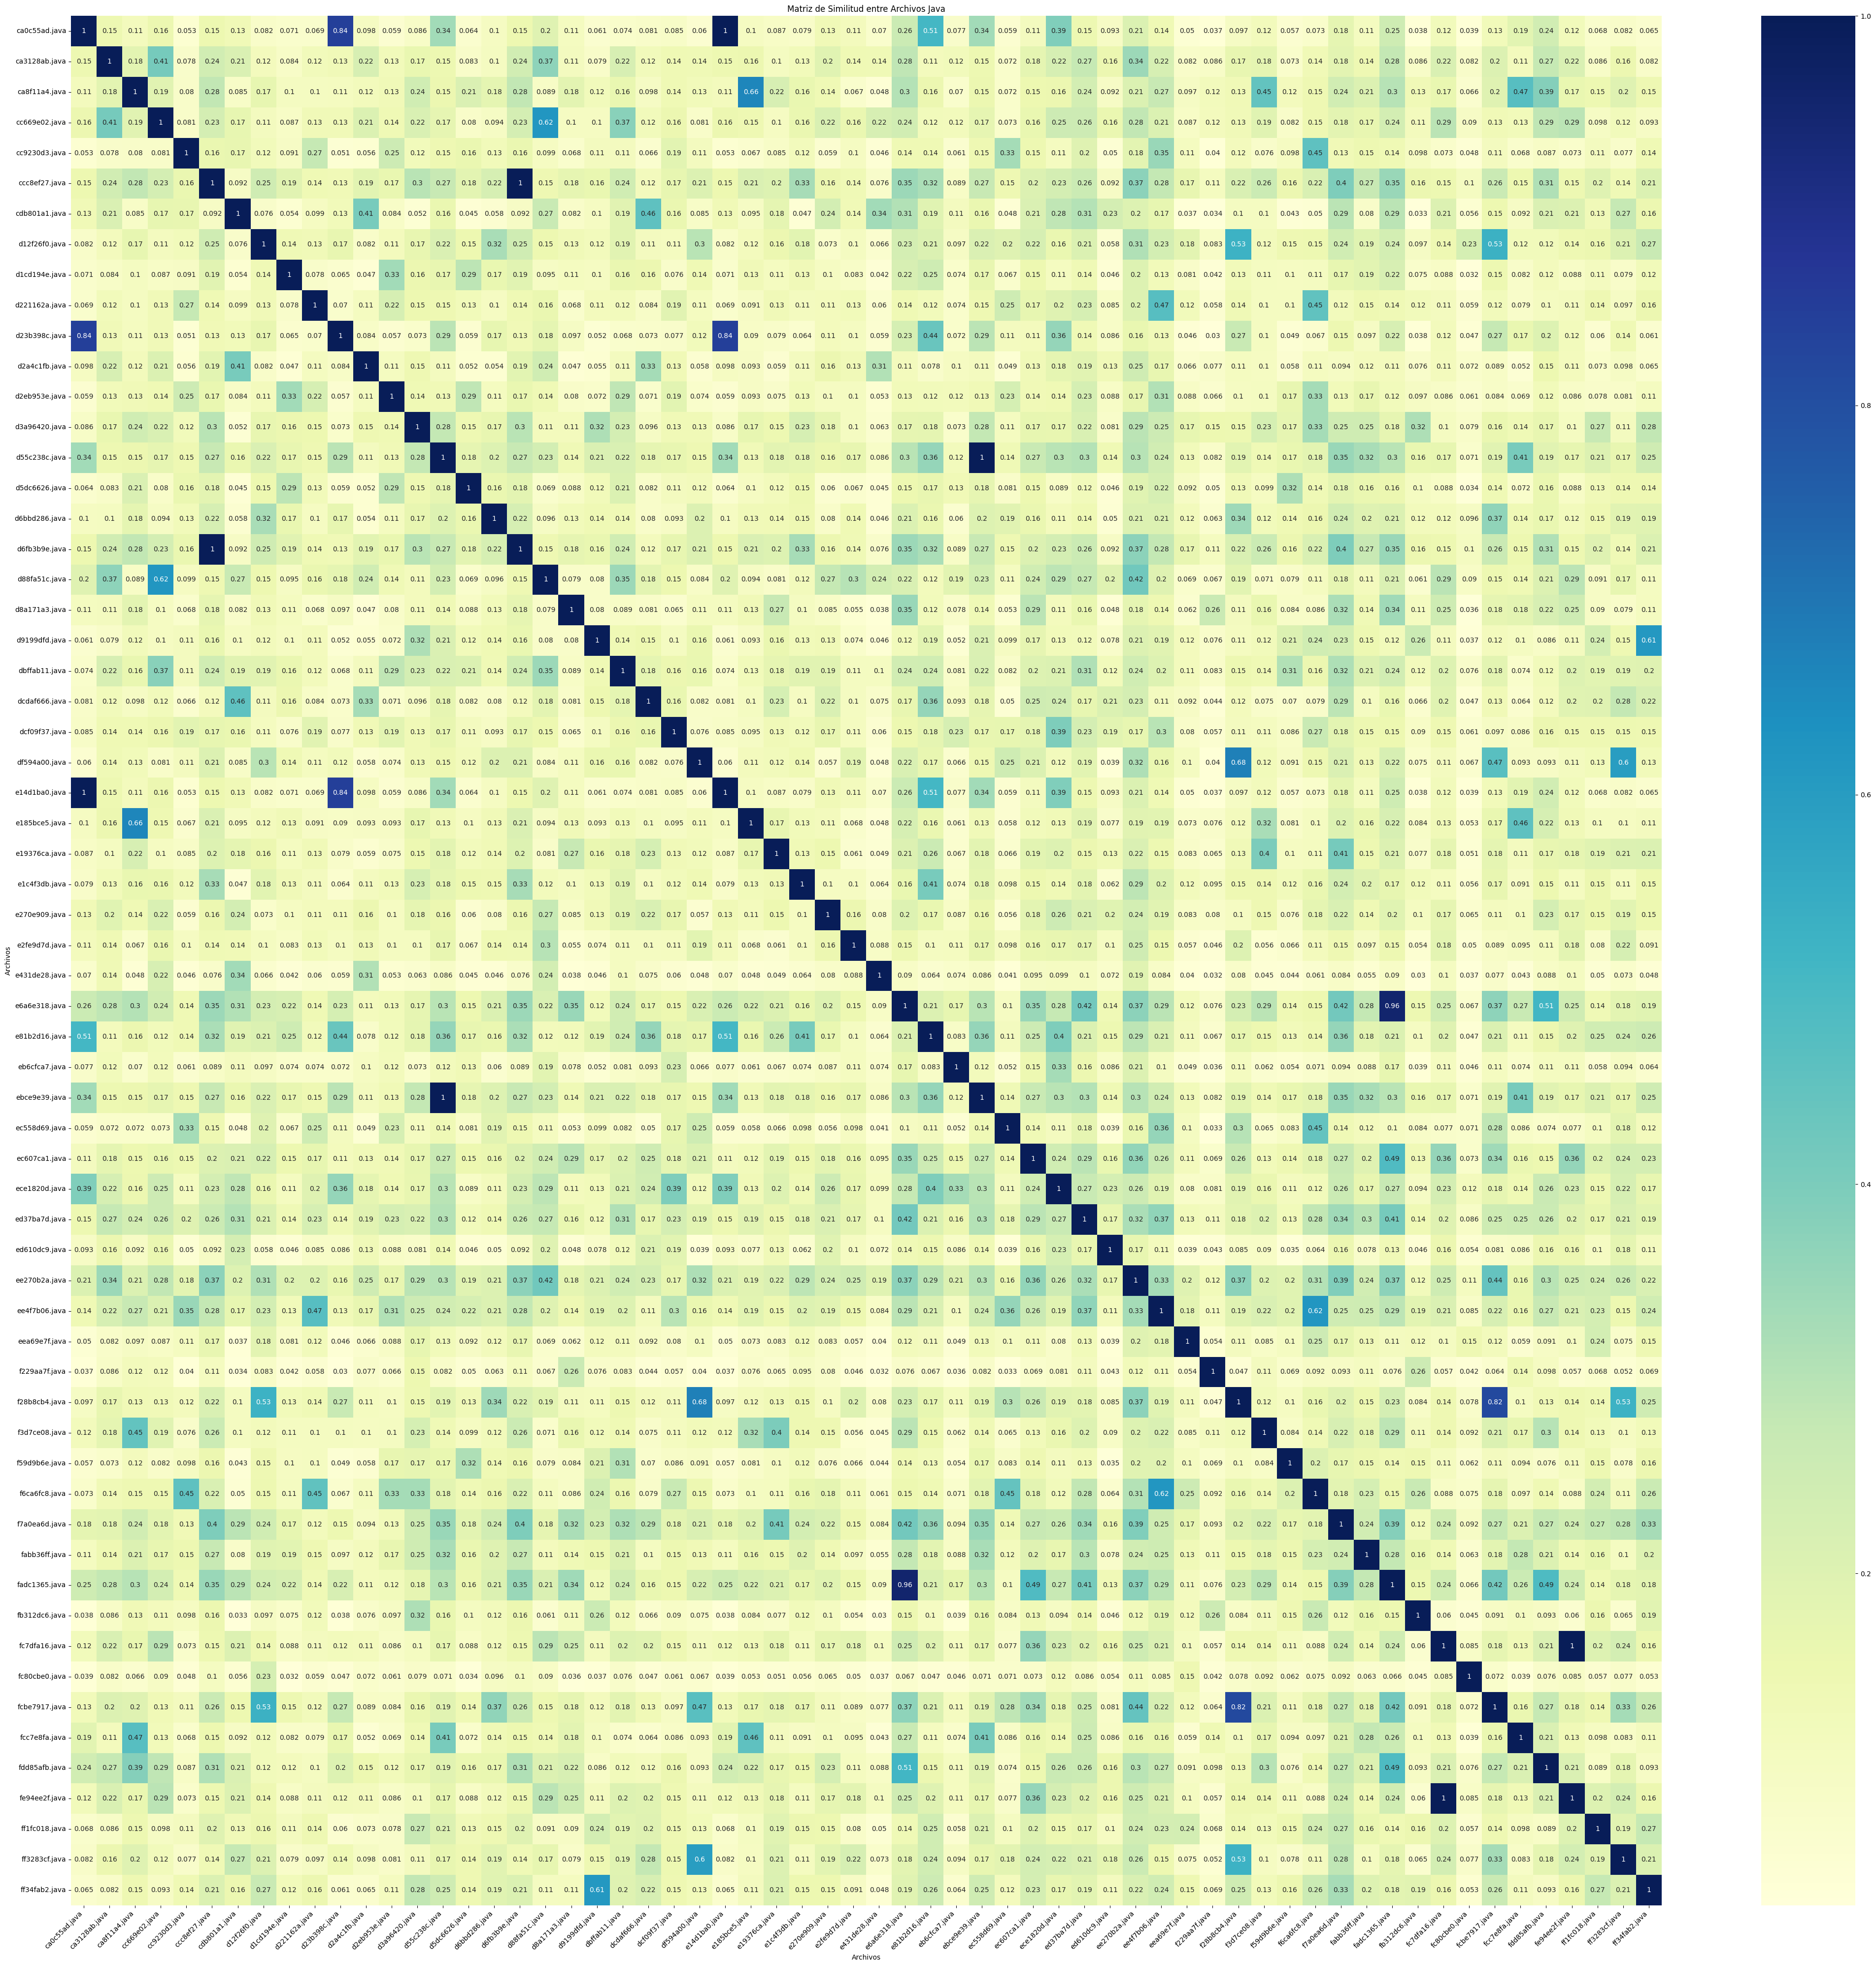

Similitud de coseno entre ca0c55ad.java y e14d1ba0.java: 1.0
Similitud de coseno entre ccc8ef27.java y d6fb3b9e.java: 1.0
Similitud de coseno entre d55c238c.java y ebce9e39.java: 1.0
Similitud de coseno entre e6a6e318.java y fadc1365.java: 0.96
Similitud de coseno entre fc7dfa16.java y fe94ee2f.java: 1.0


In [179]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Función para preprocesar el código Java
def preprocesar_codigo(archivo):
    with open(archivo, "r", encoding="utf-8") as f:
        codigo = f.read()

    # Eliminar comentarios (// y /* */)
    codigo = re.sub(r'//.*?\n', '', codigo)
    codigo = re.sub(r'/\*.*?\*/', '', codigo, flags=re.DOTALL)

    # Eliminar saltos de línea e imports
    codigo = re.sub(r'[\n\t]', ' ', codigo)
    codigo = re.sub(r'import\s+.*?;', '', codigo)

    return codigo

# Directorio que contiene los archivos .java
directorio = ".\\conplag\\test"

# Diccionario para almacenar el código preprocesado
codigo_preprocesado = {}

# Leer cada archivo .java en el directorio y preprocesar el código
for archivo in os.listdir(directorio):
    if archivo.endswith(".java"):
        ruta_completa = os.path.join(directorio, archivo)
        codigo = preprocesar_codigo(ruta_completa)
        codigo_preprocesado[archivo] = codigo

# Vectorizar los textos utilizando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(codigo_preprocesado.values())

# Calcular la similitud de coseno entre cada par de archivos
similitudes = cosine_similarity(X)

# Crear matriz de similitud
n_archivos = len(codigo_preprocesado)
matriz_similitud = np.zeros((n_archivos, n_archivos))
for i, archivo1 in enumerate(codigo_preprocesado.keys()):
    for j, archivo2 in enumerate(codigo_preprocesado.keys()):
        if i < j:
            similitud = similitudes[i, j]
            matriz_similitud[i, j] = similitud
            matriz_similitud[j, i] = similitud

# Establecer los valores de la diagonal de la matriz de similitud a 1
np.fill_diagonal(matriz_similitud, 1)

# Mostrar el heatmap
plt.figure(figsize=(42, 40))
sns.heatmap(matriz_similitud, annot=True, xticklabels=codigo_preprocesado.keys(), yticklabels=codigo_preprocesado.keys(), cmap="YlGnBu")
plt.title("Matriz de Similitud entre Archivos Java")
plt.xlabel("Archivos")
plt.ylabel("Archivos")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Conjunto para almacenar pares de archivos ya mostrados
mostrados = set()

# Imprimir la similitud entre cada par de archivos
for i, archivo1 in enumerate(codigo_preprocesado.keys()):
    for j, archivo2 in enumerate(codigo_preprocesado.keys()):
        if i < j:
            similitud = similitudes[i, j]
            if similitud >= 0.85 and (archivo1, archivo2) not in mostrados and (archivo2, archivo1) not in mostrados:
                print(f"Similitud de coseno entre {archivo1} y {archivo2}: {round(similitud, 2)}")
                mostrados.add((archivo1, archivo2))


In [180]:
# Leer el archivo jpairs.txt y almacenar los pares de archivos plagiados
pares_plagiados = set()
with open("jpairs.txt", "r") as f:
    for line in f:
        archivo1, archivo2 = line.strip().split("\t")
        pares_plagiados.add((archivo1, archivo2))

archivos_unicos = set()
for par in pares_plagiados:
    archivos_unicos.add(par[0])
    archivos_unicos.add(par[1])
total_archivos = len(archivos_unicos)

# Calcular el número total de pares plagiados
total_plagiados = len(pares_plagiados)

# Calcular el número de pares plagiados encontrados en la comparación
encontrados = 0
for par in pares_plagiados:
    if par in mostrados or (par[1], par[0]) in mostrados:
        encontrados += 1

# Calcular el accuracy
# plagiados_reales = encontrados / total_plagiados if total_plagiados > 0 else 0
total = len(mostrados)
print("Pares detectados como plagio en mostrados",total)
accuracy = encontrados / total

print(f"Total de archivos en la comparación: {len(codigo_preprocesado)}")
print(f"Total de pares plagiados: {total_plagiados}")
print(f"Pares plagiados encontrados: {encontrados}")
print(f"Accuracy: {accuracy:.2f}")


Pares detectados como plagio en mostrados 5
Total de archivos en la comparación: 62
Total de pares plagiados: 251
Pares plagiados encontrados: 4
Accuracy: 0.80
